### Validación de puntos

In [26]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('OZONO/DIARIO/OMDOAO3e/OMDOAO3e_O3_URUGUAY.csv')

In [13]:
points = df[['Latitud','Longitud']].drop_duplicates()

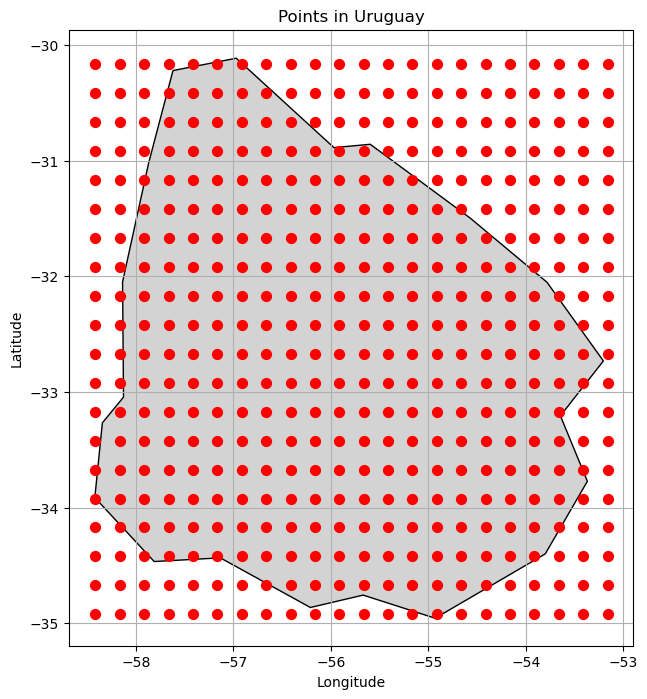

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Your coordinate data (replace with your actual data or load from file)
data = {
    'latitude': points['Latitud'].values,
    'longitude': points['Longitud'].values
}
df_ll = pd.DataFrame(data)
geometry = [Point(xy) for xy in zip(df_ll['longitude'], df_ll['latitude'])]
geo_df = gpd.GeoDataFrame(df_ll, geometry=geometry, crs="EPSG:4326")

# Load shapefile (adjust path to where you extracted the .shp file)
world = gpd.read_file("naturalearth/ne_110m_admin_0_countries.shp")

# Filter for Uruguay
uruguay = world[world['ADMIN'] == 'Uruguay']

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
uruguay.plot(ax=ax, color='lightgray', edgecolor='black')
geo_df.plot(ax=ax, color='red', markersize=50)
plt.title("Points in Uruguay")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


### Validación de un día

C:\Users\emanu\AppData\Local\Temp\ipykernel_11256\176931345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia['Ozono'] =  np.where(df_dia['Ozono'] < 0, np.nan, df_dia['Ozono'])


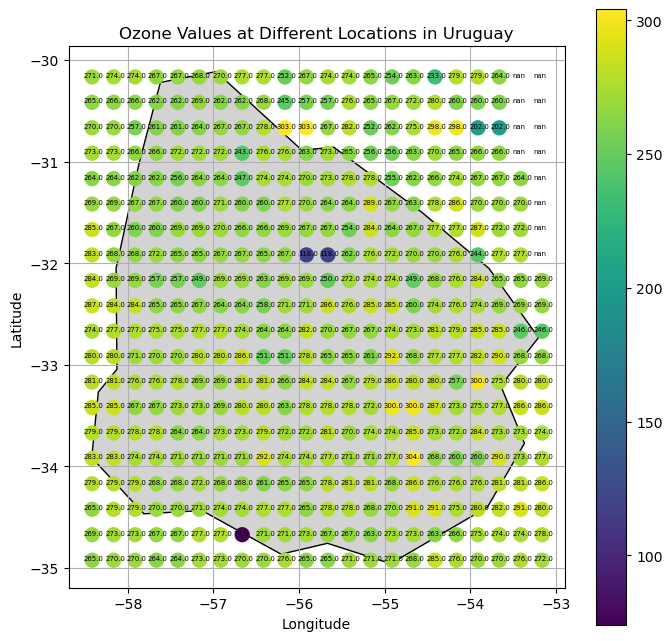

In [62]:
df_dia = df[df['Fecha'] == 20210403]

df_dia['Ozono'] =  np.where(df_dia['Ozono'] < 0, np.nan, df_dia['Ozono'])

# Your coordinate data (replace with your actual data or load from file)
data = {
    'latitude': df_dia['Latitud'].values,
    'longitude': df_dia['Longitud'].values,
    'ozono' : df_dia['Ozono'].values
}
df_ll = pd.DataFrame(data)
geometry = [Point(xy) for xy in zip(df_ll['longitude'], df_ll['latitude'])]
geo_df = gpd.GeoDataFrame(df_ll, geometry=geometry, crs="EPSG:4326")

# Load Uruguay shapefile
world = gpd.read_file("naturalearth/ne_110m_admin_0_countries.shp")
uruguay = world[world['ADMIN'] == 'Uruguay']

# Plot map and ozone values
fig, ax = plt.subplots(figsize=(8, 8))
uruguay.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot points, color-coded by ozone value
geo_df.plot(ax=ax, column='ozono', cmap='viridis', markersize=100, legend=True)

# Optional: Annotate points with ozone values
for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, round(geo_df['ozono'],0)):
    ax.text(x-0.1, y, f'{label}', fontsize=5, color='black')

plt.title("Ozone Values at Different Locations in Uruguay")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

Foto del mapa de giovanni

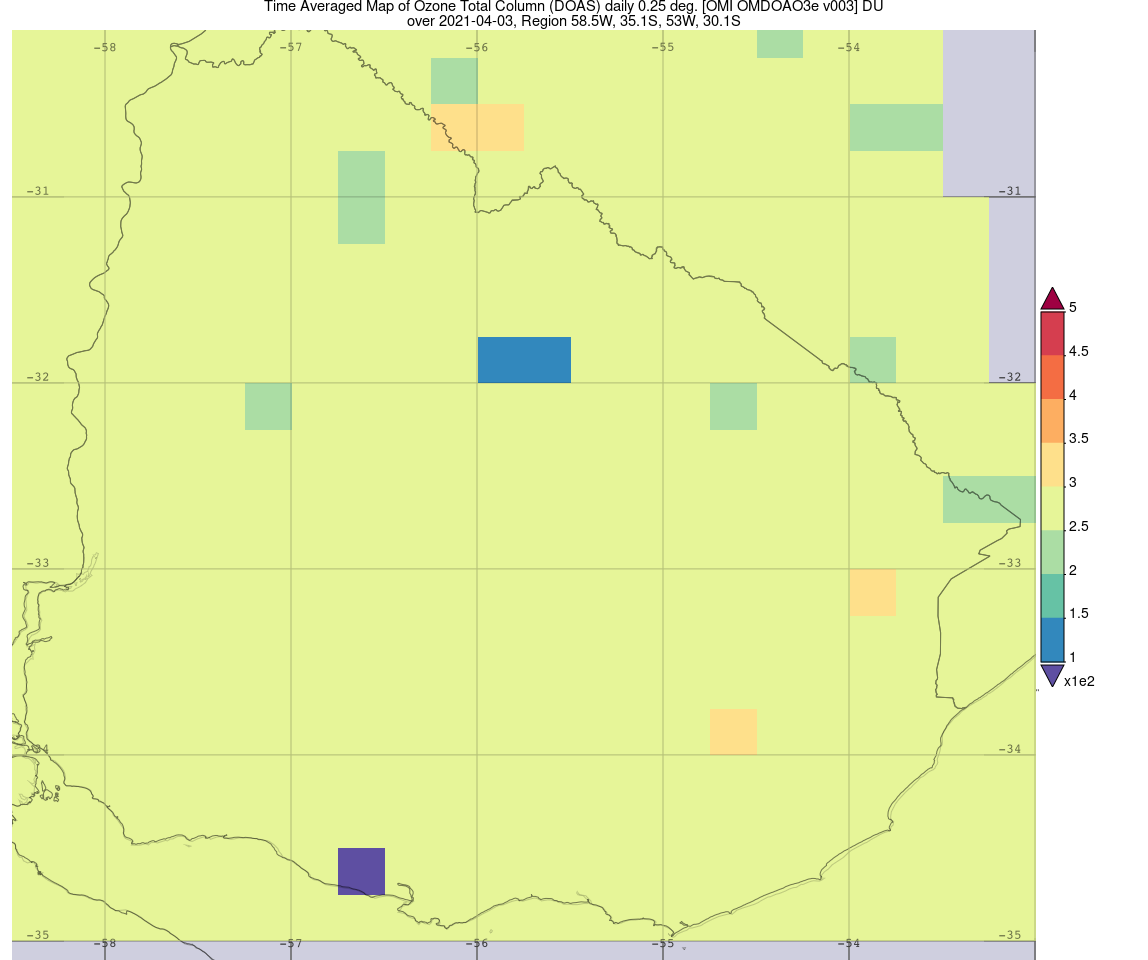